In [1]:
# PART ONE
# Data preparation
# The first assignment is to read data from a data file. The data is often given
# in a .csv file (Comma Separated Values). For this exercise we have a data set
# given from SMHI.

In [2]:
# In the beginning of the project we use to define all libraries that we want
# to use in this project.

# pandas - makes it possible to read datafiles and put the into dataframes
# which is really useful when we work with big sets of data.
import pandas as pd

In [3]:
# Read in the training set
# As you can see - we have two different datasets for this assignment.

# One dataset is given to train our neural network and one is given to test
# the neural network. We start to look at the training set.

training_data = pd.read_csv('01_smhi_training_data.csv', sep=";")

In [4]:
# When we run this cell we see nothing. To see the variable we created just
# simply write the variable you want to be visible (in this specific case we
# want to see the variable "training_data")

training_data

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1993-04-28,00:38:00,10.1,Y,NaN,NaN
1,1993-04-28,01:38:00,9.1,Y,NaN,NaN
2,1993-04-28,02:38:00,8.8,Y,NaN,NaN
3,1993-04-28,03:38:00,8.9,Y,NaN,NaN
4,1993-04-28,04:38:00,10.7,Y,NaN,NaN
...,...,...,...,...,...,...
243917,2021-06-30,19:00:00,17.1,G,NaN,NaN
243918,2021-06-30,20:00:00,17.0,G,NaN,NaN
243919,2021-06-30,21:00:00,15.6,G,NaN,NaN
243920,2021-06-30,22:00:00,15.3,G,NaN,NaN


In [5]:
# As you can see - we have air temperatures given from 1993 to 2021 
# measured at each hour. This gives us 243 922 values to handle. A good way
# to get an overview of our dataset is to use .info() and .head()

training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243922 entries, 0 to 243921
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Datum           243922 non-null  object 
 1   Tid (UTC)       243922 non-null  object 
 2   Lufttemperatur  243922 non-null  float64
 3   Kvalitet        243922 non-null  object 
 4   Unnamed: 4      0 non-null       float64
 5   Tidsutsnitt:    0 non-null       float64
dtypes: float64(3), object(3)
memory usage: 11.2+ MB


In [6]:
# The info panel is good to explore to see if we have any null values. In that
# case we need to clean this data. For this assignment we are only interested
# in the columns "Datum". "Tid (UTC)" and "Lufttemperatur".
# Since these columns are clean from null values we don't make a further 
# analysis. 

# In this given example we work with a nice and clear dataset. This assignment 
# is more focused on preparation of data and how to make readable for a neural 
# network. We can dive deeper into the cleaning process of data in another 
# assignment.

# Let's take a look at the .head() method
training_data.head()

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1993-04-28,00:38:00,10.1,Y,NaN,NaN
1,1993-04-28,01:38:00,9.1,Y,NaN,NaN
2,1993-04-28,02:38:00,8.8,Y,NaN,NaN
3,1993-04-28,03:38:00,8.9,Y,NaN,NaN
4,1993-04-28,04:38:00,10.7,Y,NaN,NaN


In [7]:
# This gives us the five first rows in the dataset. I like to always use this
# to make sure that my data is read correctly and to see what variables my
# dataset contains.

# Tips and tricks
# You can ask the method to reveal a certain number of rows, e.g. 20 rows:
training_data.head(20)

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1993-04-28,00:38:00,10.1,Y,NaN,NaN
1,1993-04-28,01:38:00,9.1,Y,NaN,NaN
2,1993-04-28,02:38:00,8.8,Y,NaN,NaN
3,1993-04-28,03:38:00,8.9,Y,NaN,NaN
4,1993-04-28,04:38:00,10.7,Y,NaN,NaN
5,1993-04-28,05:38:00,12.8,Y,NaN,NaN
6,1993-04-28,07:00:00,15.2,Y,NaN,NaN
7,1993-04-28,08:00:00,14.6,Y,NaN,NaN
8,1993-04-28,10:00:00,15.7,Y,NaN,NaN
9,1993-04-28,11:00:00,16.0,Y,NaN,NaN


In [8]:
# The next step to consider is what data in this dataset is of interest.
# The columns "Kvalitet", "Unnamed: 4" and "Tidsutsnitt" is not of interest.
# For this assignment we only need the columns "Datum". "Tid (UTC)" and 
# "Lufttemperatur". For the neural network is only interested of the
# temperature data so we start to create an array with only this data.

# The next step is therefore to select data of interest 
# --> save this data in a numpy array
# NOTE: We use .values to convert the data to an numpy array
training_set_temp = training_data.iloc[:, 2:3].values
training_set_temp

array([[10.1],
       [ 9.1],
       [ 8.8],
       ...,
       [15.6],
       [15.3],
       [15.1]])

In [9]:
# The next preparation step is to scale our data. I recommend you to read this
# article to better understand why we need to scale our data:
# https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/

# When scaling the training_set_temp we normally use standardization or normalization.
# The neural network that we are creating will have a continuous output since
# the network will make predictions of the air temperature.
# Since our output signal is continuous --> NORMALIZATION is recommended

# Import library with predefined scalers
from sklearn.preprocessing import MinMaxScaler

# Create a scalar with value (range) between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))

# Apply scaler on training set
training_set_temp_scaled = scaler.fit_transform(training_set_temp)
training_set_temp_scaled

array([[0.60611205],
       [0.58913413],
       [0.58404075],
       ...,
       [0.69949066],
       [0.69439728],
       [0.6910017 ]])

In [10]:
# In this example we will create a neural network 
# called RNN (Recurrent Neural Network). You can read more about this kind 
# of network here:
# https://www.ibm.com/cloud/learn/recurrent-neural-networks

# The RNN has have the concept of ‘memory’ that helps them store the states 
# or information of previous inputs to generate the next output of the 
# sequence. We now need to modify our array into a data structure that could be 
# understood by a RNN.

# Create a data structure with 48 timesteps (X_train) and 1 output (y_train)
# timesteps --> 48 previous hours are used to predict the next output
# X_train --> 48 previous temperature measures
# y_train --> value at the current hour
# NOTE: [] --> is a type list and NOT a np array
X_train = []
y_train = [] 

timestep = 48
observations = len(training_set_temp_scaled) # 243922 rows

for i in range(timestep, observations):
        X_train.append(training_set_temp_scaled[i-timestep:i,0])
        y_train.append(training_set_temp_scaled[i,0])

In [11]:
# Take a look att X_train and try to understand what we did in the previous step
X_train

[array([0.60611205, 0.58913413, 0.58404075, 0.58573854, 0.61629881,
        0.65195246, 0.69269949, 0.68251273, 0.70118846, 0.70628183,
        0.71986418, 0.72156197, 0.70458404, 0.66213922, 0.57555178,
        0.55008489, 0.5008489 , 0.48896435, 0.46689304, 0.45670628,
        0.45500849, 0.53310696, 0.54329372, 0.57385399, 0.61120543,
        0.66213922, 0.66893039, 0.68590832, 0.69779287, 0.69269949,
        0.67232598, 0.65195246, 0.62988115, 0.59932088, 0.57555178,
        0.51952462, 0.49066214, 0.47028862, 0.56706282, 0.60950764,
        0.63837012, 0.70118846, 0.73174873, 0.74533107, 0.75042445,
        0.74872666, 0.71646859, 0.6893039 ]),
 array([0.58913413, 0.58404075, 0.58573854, 0.61629881, 0.65195246,
        0.69269949, 0.68251273, 0.70118846, 0.70628183, 0.71986418,
        0.72156197, 0.70458404, 0.66213922, 0.57555178, 0.55008489,
        0.5008489 , 0.48896435, 0.46689304, 0.45670628, 0.45500849,
        0.53310696, 0.54329372, 0.57385399, 0.61120543, 0.66213922,
  

In [12]:
# Take a look att y_train and try to understand what we did in the previous step
y_train

[0.6502546689303905,
 0.6146010186757216,
 0.5874363327674024,
 0.5466893039049237,
 0.5195246179966044,
 0.47707979626485575,
 0.4651952461799661,
 0.46349745331069614,
 0.5280135823429543,
 0.5874363327674024,
 0.6349745331069611,
 0.6842105263157895,
 0.7266553480475382,
 0.735144312393888,
 0.735144312393888,
 0.736842105263158,
 0.7283531409168083,
 0.7147707979626486,
 0.6740237691001698,
 0.6485568760611206,
 0.6196943972835315,
 0.5823429541595926,
 0.5432937181663837,
 0.5382003395585739,
 0.5382003395585739,
 0.5398981324278439,
 0.5602716468590833,
 0.5789473684210527,
 0.6129032258064517,
 0.6349745331069611,
 0.6893039049235994,
 0.7826825127334466,
 0.7911714770797964,
 0.797962648556876,
 0.7894736842105263,
 0.7775891341256367,
 0.7436332767402377,
 0.733446519524618,
 0.6994906621392191,
 0.6621392190152802,
 0.6383701188455009,
 0.5891341256366723,
 0.5585738539898133,
 0.5263157894736843,
 0.5093378607809848,
 0.536502546689304,
 0.5585738539898133,
 0.60611205432937

In [13]:
# X_train and y_train are now in list format and can not be understood by a neural network.
# We now need to convert these list into np.arrays which is the format
# that the RNN can understand and read.

# Import library numpy to convert the lists to np.arrays
import numpy as np

# Convert the lists X_train and y_train to np.arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train.shape

(243874, 48)

In [15]:
y_train.shape

(243874,)

In [16]:
# The last step we need to do is to reshape our X_train array to fulfill 
# requirement of inputs for the RNN 

# We currently have an 2D matrix - X_train --> (243874, 48) matrix
# We want a 3D matrix - the third dimension corresponds to the indicator
# In this case the indicator is 1 since we have one output
# array.shape[0] --> number of rows
# array.shape[1] --> number of columns
# reshape(arrayLike, newShape, order)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
# Well done! 
# You have now prepared the dataset to be able to function as 
# input for a neural network. The next step is to build our RNN.

In [18]:
# PART TWO
# Prepare the neural network (RNN)
# For this part i will give you a basic RNN to work with
# Keras documentation is really good to look at to learn more about the specific
# classes and methods used in the Regressor function defined below.

# Keras documentation: https://keras.io/api/

# lstm - long-short term memory
# units - number of neurons in the layer

# To read more generally about neural networks look here:
# https://wiki.pathmind.com/neural-network

# Building  the RNN (Recurrent Neural Network)
# Import Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

def Regressor(X_train):
    
    # Initializing the RNN 
    model = Sequential()
    
    # Add the first layer to the neural network
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    
    # Dropout regulation (use to be 20%)
    # --> this is the number of neurons to be ignored
    model.add(Dropout(0.2))
    
    # Add more layers to the neural network
    # Second layer
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    
    # Third layer
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    
    # Forth layer - last layer before output  layer
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(units = 1))
    
    # Compiling the RNN
    # NOTE: Optimizer - RMSprops is recommended for RNN but Adam was detected to 
    # be a better choice for this problem
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return model

In [19]:
# We now have a basic RNN called Regressor. The next step is to give this 
# neural network our prepared dataset (X_train) to train on.

# Create a RNN model instance
regressor = Regressor(X_train)

# Training - fit the RNN to the training set
# epochs - the amount of "training sets" the network should do (experiment with 
# this value and evaluate the results)
# batch_size - number of data rows that will be sent into the network momentarily
# for training

# This step will take a while depending on the amount of epochs 
# you chose, size of your dataset and the capacity of you computer. 
# We start with 20 epochs just to demonstrate how the training works. You can
# increase this value later to get a better result.
regressor.fit(
    X_train, 
    y_train, 
    epochs = 20, 
    batch_size = 32)

Epoch 1/20
7622/7622 [==============================] - 107s 13ms/step - loss: 0.0020
Epoch 2/20
7622/7622 [==============================] - 100s 13ms/step - loss: 4.2579e-04
Epoch 3/20
7622/7622 [==============================] - 100s 13ms/step - loss: 3.8792e-04
Epoch 4/20
7622/7622 [==============================] - 98s 13ms/step - loss: 3.6664e-04
Epoch 5/20
7622/7622 [==============================] - 96s 13ms/step - loss: 3.5426e-04
Epoch 6/20
7622/7622 [==============================] - 99s 13ms/step - loss: 3.4368e-04
Epoch 7/20
7622/7622 [==============================] - 99s 13ms/step - loss: 3.3583e-04
Epoch 8/20
7622/7622 [==============================] - 98s 13ms/step - loss: 3.3257e-04
Epoch 9/20
7622/7622 [==============================] - 96s 13ms/step - loss: 3.2847e-04
Epoch 10/20
7622/7622 [==============================] - 97s 13ms/step - loss: 3.2351e-04
Epoch 11/20
7622/7622 [==============================] - 98s 13ms/step - loss: 3.1850e-04
Epoch 12/20
7622/762

In [20]:
# Well done! When the Epoch is set to 10/10 your network is done training! :)
# It is time to make a prediction of the air temperature with our regressor.

In [21]:
# First of all we need our test data set to compare with the result we got from our
test_data = pd.read_csv('02_smhi_test_data.csv', sep=";")

In [22]:
# We use the .info and .describe methods to make sure that our test data
# was read correctly

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datum           48 non-null     object 
 1   Tid (UTC)       48 non-null     object 
 2   Lufttemperatur  48 non-null     float64
 3   Kvalitet        48 non-null     object 
 4   Unnamed: 4      0 non-null      float64
 5   Tidsutsnitt:    0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 2.4+ KB


In [23]:
test_data.describe()

,Lufttemperatur,Unnamed: 4,Tidsutsnitt:
count,48.000000,0.0,0.0
mean,19.893750,NaN,NaN
std,4.134052,NaN,NaN
min,12.900000,NaN,NaN
25%,16.475000,NaN,NaN
50%,19.450000,NaN,NaN
75%,23.800000,NaN,NaN
max,25.500000,NaN,NaN


In [24]:
# Our test data looks good!

# We now make the same procedure as we did with the training set - we 
# choose the data needed for this calculation (air temperature)
real_temperature = test_data.iloc[:, 2:3].values
real_temperature

array([[14.7],
       [14.6],
       [14.3],
       [13.2],
       [12.9],
       [13.4],
       [14.5],
       [14.9],
       [15.3],
       [18.6],
       [17.2],
       [19.3],
       [22.9],
       [23.7],
       [24.9],
       [24.8],
       [24.1],
       [23.5],
       [23.2],
       [22.5],
       [21.4],
       [19.6],
       [19.1],
       [18.3],
       [17.7],
       [17.1],
       [16.6],
       [16.1],
       [17.5],
       [19.2],
       [20.4],
       [21.6],
       [23.4],
       [24.6],
       [25.5],
       [25.5],
       [25.2],
       [25.2],
       [25.5],
       [25.3],
       [24.1],
       [24.1],
       [22.6],
       [21.2],
       [19.1],
       [17.3],
       [15.2],
       [14. ]])

In [25]:
# For the last part of this assignment we would like to be able to print out
# the time and date for the prediction. Therefore we make some prep-work
# --> we save the date and time into a dataframe to use later
date_time = pd.to_datetime(test_data['Datum'] + ' ' + test_data['Tid (UTC)'])
date_time

0    2021-07-01 00:00:00
1    2021-07-01 01:00:00
2    2021-07-01 02:00:00
3    2021-07-01 03:00:00
4    2021-07-01 04:00:00
5    2021-07-01 05:00:00
6    2021-07-01 06:00:00
7    2021-07-01 07:00:00
8    2021-07-01 08:00:00
9    2021-07-01 09:00:00
10   2021-07-01 10:00:00
11   2021-07-01 11:00:00
12   2021-07-01 12:00:00
13   2021-07-01 13:00:00
14   2021-07-01 14:00:00
15   2021-07-01 15:00:00
16   2021-07-01 16:00:00
17   2021-07-01 17:00:00
18   2021-07-01 18:00:00
19   2021-07-01 19:00:00
20   2021-07-01 20:00:00
21   2021-07-01 21:00:00
22   2021-07-01 22:00:00
23   2021-07-01 23:00:00
24   2021-07-02 00:00:00
25   2021-07-02 01:00:00
26   2021-07-02 02:00:00
27   2021-07-02 03:00:00
28   2021-07-02 04:00:00
29   2021-07-02 05:00:00
30   2021-07-02 06:00:00
31   2021-07-02 07:00:00
32   2021-07-02 08:00:00
33   2021-07-02 09:00:00
34   2021-07-02 10:00:00
35   2021-07-02 11:00:00
36   2021-07-02 12:00:00
37   2021-07-02 13:00:00
38   2021-07-02 14:00:00
39   2021-07-02 15:00:00


In [26]:
# We need to prepare the test data set to function correctly with an RNN. Try
# to look a little bit deeper into why we need to do this preparation step.
# Tips: Read about the RNN and how it work corresponding data at different
# time steps (memory)
dataset_total = pd.concat((training_data['Lufttemperatur'], test_data['Lufttemperatur']), axis = 0)
dataset_total

0     10.1
1      9.1
2      8.8
3      8.9
4     10.7
      ... 
43    21.2
44    19.1
45    17.3
46    15.2
47    14.0
Name: Lufttemperatur, Length: 243970, dtype: float64

In [27]:
inputs = dataset_total[len(dataset_total) - len(test_data) - 48:].values
inputs

array([16.7, 15.5, 14.7, 15. , 16.1, 17.9, 18.6, 19.6, 20.9, 22.2, 22.3,
       23.2, 24.1, 24.3, 24.7, 24.6, 23.7, 23.7, 21.7, 20.9, 18.5, 17.4,
       15.4, 14.8, 15.5, 15.4, 15.6, 16.1, 16.3, 15.6, 16.1, 16.9, 18.8,
       19.4, 19.6, 19.8, 19.7, 19.3, 19.3, 19.7, 19.8, 19. , 17.9, 17.1,
       17. , 15.6, 15.3, 15.1, 14.7, 14.6, 14.3, 13.2, 12.9, 13.4, 14.5,
       14.9, 15.3, 18.6, 17.2, 19.3, 22.9, 23.7, 24.9, 24.8, 24.1, 23.5,
       23.2, 22.5, 21.4, 19.6, 19.1, 18.3, 17.7, 17.1, 16.6, 16.1, 17.5,
       19.2, 20.4, 21.6, 23.4, 24.6, 25.5, 25.5, 25.2, 25.2, 25.5, 25.3,
       24.1, 24.1, 22.6, 21.2, 19.1, 17.3, 15.2, 14. ])

In [28]:
# This is the transformation of data shape needed to be understood by the RNN:s
# prediction function. We also need to scale our data
# NOTE: make sure that you always use the same scalar through the whole calculation.
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs

array([[0.71816638],
       [0.69779287],
       [0.68421053],
       [0.6893039 ],
       [0.70797963],
       [0.7385399 ],
       [0.75042445],
       [0.76740238],
       [0.78947368],
       [0.81154499],
       [0.81324278],
       [0.82852292],
       [0.84380306],
       [0.84719864],
       [0.85398981],
       [0.85229202],
       [0.83701188],
       [0.83701188],
       [0.80305603],
       [0.78947368],
       [0.74872666],
       [0.73005093],
       [0.69609508],
       [0.68590832],
       [0.69779287],
       [0.69609508],
       [0.69949066],
       [0.70797963],
       [0.71137521],
       [0.69949066],
       [0.70797963],
       [0.72156197],
       [0.75382003],
       [0.76400679],
       [0.76740238],
       [0.77079796],
       [0.76910017],
       [0.762309  ],
       [0.762309  ],
       [0.76910017],
       [0.77079796],
       [0.75721562],
       [0.7385399 ],
       [0.72495756],
       [0.72325976],
       [0.69949066],
       [0.69439728],
       [0.691

In [29]:
# Create a data structure as we did with the training set
# timesteps --> 48 previous hours are used to predict the next output
# X_test --> 48 previous temperature measures
# NOTE: [] --> is a type list and NOT a np array

timestep = 48
observations = len(inputs) # 96 rows

X_test = []
for i in range(48, 96):
    X_test.append(inputs[i-48:i, 0])

# Transform the results to be acceptable input for the prediction function.
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
# Now it is time! All prep-work is done! Let's make our first prediction! :)
predicted_temperature = regressor.predict(X_test)
predicted_temperature

array([[0.68557656],
       [0.6797606 ],
       [0.68159604],
       [0.6787073 ],
       [0.6569277 ],
       [0.6591019 ],
       [0.67772955],
       [0.70296144],
       [0.7061739 ],
       [0.71097684],
       [0.76899636],
       [0.74730325],
       [0.77586085],
       [0.824131  ],
       [0.85115206],
       [0.869895  ],
       [0.86746144],
       [0.8452295 ],
       [0.82480586],
       [0.81553763],
       [0.7991062 ],
       [0.7780952 ],
       [0.7436662 ],
       [0.74149853],
       [0.7297538 ],
       [0.7222799 ],
       [0.71526897],
       [0.71088916],
       [0.70597655],
       [0.74666595],
       [0.78322524],
       [0.8065887 ],
       [0.8272924 ],
       [0.8573369 ],
       [0.87709075],
       [0.8902997 ],
       [0.8858453 ],
       [0.8720864 ],
       [0.8670509 ],
       [0.8704806 ],
       [0.8642566 ],
       [0.83399564],
       [0.8307178 ],
       [0.8008124 ],
       [0.7748499 ],
       [0.7381923 ],
       [0.71276116],
       [0.679

In [31]:
# Remember that this data is scaled so we now need to use the scalar to inversely transform  the data.
predicted_temperature = scaler.inverse_transform(predicted_temperature)
predicted_temperature

array([[14.780458],
       [14.437899],
       [14.546007],
       [14.37586 ],
       [13.093042],
       [13.221103],
       [14.318271],
       [15.804428],
       [15.993642],
       [16.276535],
       [19.693886],
       [18.41616 ],
       [20.098204],
       [22.941317],
       [24.532856],
       [25.636814],
       [25.493479],
       [24.184017],
       [22.981064],
       [22.435165],
       [21.467354],
       [20.229805],
       [18.201937],
       [18.074263],
       [17.382498],
       [16.942286],
       [16.529343],
       [16.271372],
       [15.982018],
       [18.378624],
       [20.531965],
       [21.908075],
       [23.127522],
       [24.897142],
       [26.060644],
       [26.83865 ],
       [26.576288],
       [25.765888],
       [25.469297],
       [25.671307],
       [25.304714],
       [23.522343],
       [23.329279],
       [21.567852],
       [20.038658],
       [17.879528],
       [16.381632],
       [14.444611]], dtype=float32)

In [32]:
# Perfect! We now have our temperature prediction. Now it is time to make a visualization to
# evaluate our results! :)

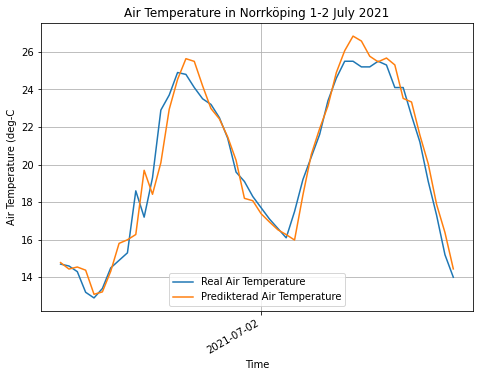

In [33]:
# PART THREE
# Visualize results

# First of all we need to import the libraries we need to make the plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# We create a figure to draw our plot in. Then we add som axes:    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Now we can add our the date and time that we prepared earlier in the
# variable "date_time".
# We also add the real temperature and the predicted temperature to see
# how well our RNN guessed.
ax.plot(date_time, real_temperature)
ax.plot(date_time, predicted_temperature)

# We need to define in what format we want the x axis to be displayed: 'YYYY-mm-dd' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# This you can choose - I like to see the grids.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them. This is just to make the graph
# to look nicer! :)
fig.autofmt_xdate()

# We put a title to the graph and some x,y-labels.
# Also put in legends to be able to see which one is the real values 
# and which are predicted.
plt.title('Air Temperature in Norrköping 1-2 July 2021')
plt.xlabel('Time')
plt.ylabel('Air Temperature (deg-C')
plt.legend(['Real Air Temperature', 'Predikterad Air Temperature'])

In [34]:
# Well done! This is all for this time. Use this code as a template for your own problems and experiment
# with the results. Have fun! :)